# Customer Segmentation With labeled Data

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing training dataset

df_train = pd.read_csv(r'C:\Users\kinwa\Downloads\Train (1).csv')
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
# importing test dataset

df_test = pd.read_csv(r'C:\Users\kinwa\Downloads\Test (1).csv')
df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [4]:
df_train.shape, df_test.shape

((8068, 11), (2627, 11))

In [5]:
# dropping unnecessary columns

df_train.drop(['ID', 'Var_1'], axis=1, inplace=True)
df_test.drop(['ID', 'Var_1'], axis=1, inplace=True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   object 
 1   Ever_Married     2577 non-null   object 
 2   Age              2627 non-null   int64  
 3   Graduated        2603 non-null   object 
 4   Profession       2589 non-null   object 
 5   Work_Experience  2358 non-null   float64
 6   Spending_Score   2627 non-null   object 
 7   Family_Size      2514 non-null   float64
 8   Segmentation     2627 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 184.8+ KB


In [8]:
# checking for null values

df_train.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

In [9]:
# dropping the null values 

df_train.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

In [10]:
df_train.isnull().any().any()

False

In [11]:
df_test.isnull().any().any()

False

In [12]:
# looking at the counts of our target variable

df_train['Segmentation'].value_counts()

Segmentation
D    1772
C    1735
A    1628
B    1583
Name: count, dtype: int64

In [13]:
# let's find the categorical variables

cat_vars = [var for var in df_train.columns if df_train[var].dtype == 'O']

cat_vars

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Segmentation']

In [14]:
# with categorical variables like Gender, Ever_married, Graduated having binary values we should see the
# unique values for the rest of categorical variables

print("Profession :", df_train['Profession'].unique(), "\n")
print("Spending_Score :", df_train['Spending_Score'].unique())

Profession : ['Healthcare' 'Engineer' 'Lawyer' 'Artist' 'Doctor' 'Homemaker'
 'Entertainment' 'Marketing' 'Executive'] 

Spending_Score : ['Low' 'High' 'Average']


In [15]:
# Let's map the binary categorical variables as 0 and 1
# given there are only a few binary categorical variables, we can transform them variables

# for gender
df_train['Gender'] = df_train['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# for ever_married
df_train['Ever_Married'] = df_train['Ever_Married'].apply(lambda x: 1 if x == 'Yes' else 0)

# for graduated
df_train['Graduated'] = df_train['Graduated'].apply(lambda x: 1 if x == 'Yes' else 0)

In [16]:
# Let's do the same for test sets

# for gender
df_test['Gender'] = df_test['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# for ever_married
df_test['Ever_Married'] = df_test['Ever_Married'].apply(lambda x: 1 if x == 'Yes' else 0)

# for graduated
df_test['Graduated'] = df_test['Graduated'].apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,Healthcare,1.0,Low,4.0,D
2,0,1,67,1,Engineer,1.0,Low,1.0,B
3,1,1,67,1,Lawyer,0.0,High,2.0,B
5,1,1,56,0,Artist,0.0,Average,2.0,C
6,1,0,32,1,Healthcare,1.0,Low,3.0,C


# Necessary Visualizations

In [18]:
# Let's visualize the relationship between the variables and the target variables individually.

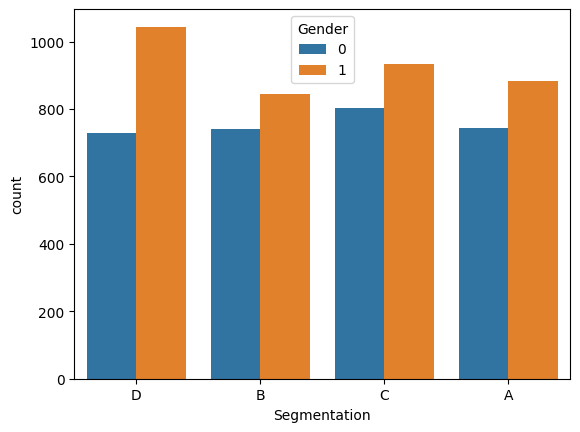

In [19]:
# For Gender

sns.countplot(x='Segmentation', hue='Gender', data=df_train)
plt.show()

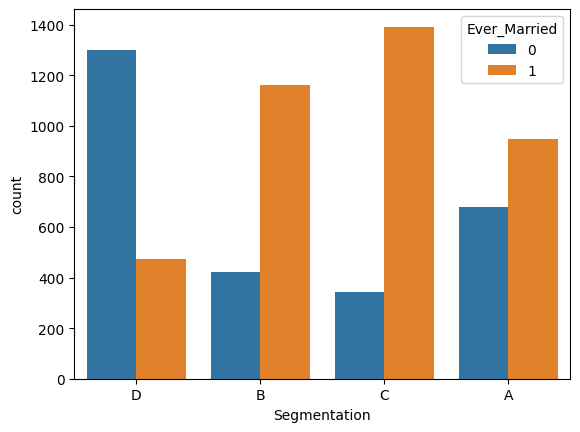

In [20]:
# For ever_married

sns.countplot(x='Segmentation', hue='Ever_Married', data=df_train)
plt.show()

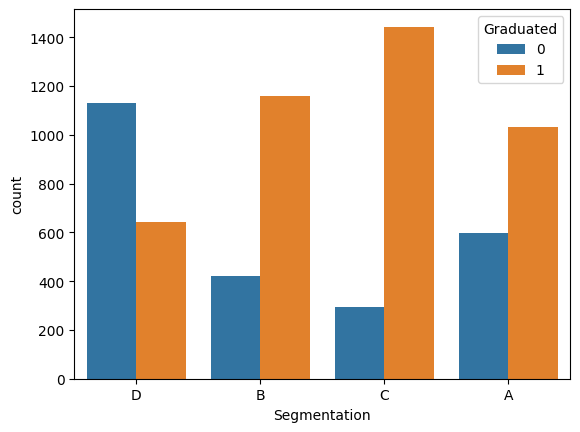

In [21]:
# For graduated

sns.countplot(x='Segmentation', hue='Graduated', data=df_train)
plt.show()

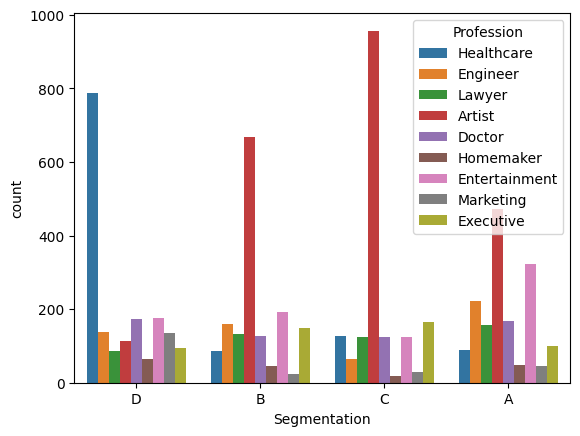

In [22]:
# For Profession

sns.countplot(x='Segmentation', hue='Profession', data=df_train)
plt.show()

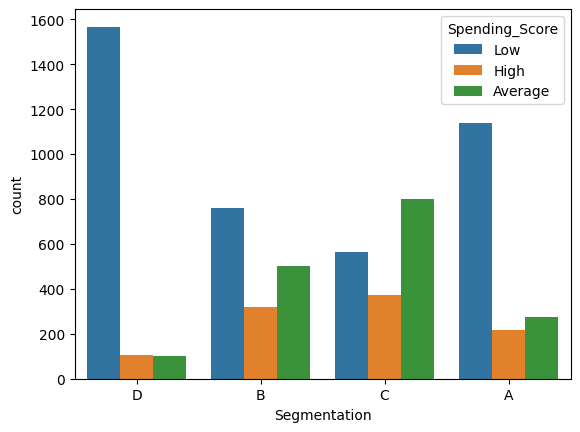

In [23]:
# For spending_score

sns.countplot(x='Segmentation', hue='Spending_Score', data=df_train)
plt.show()

## Some Feature Engineering

In [24]:
# there are two columns in our dataset with categorical variables therefore we need to encode them
# now these categorical columns don't have a large variety of values, therefore we should apply
# one_hot encoding.

columns = ['Profession', 'Spending_Score']
encoded_df_train = pd.get_dummies(df_train, columns=columns)
# Identify boolean columns
boolean_columns = encoded_df_train.select_dtypes(include='bool').columns

# Convert boolean columns to 0/1 using a loop
for col in boolean_columns:
    encoded_df_train[col] = encoded_df_train[col].astype(int)

In [25]:
# now let's do the same for test sets

columns = ['Profession', 'Spending_Score']
encoded_df_test = pd.get_dummies(df_test, columns=columns)
# Identify boolean columns
boolean_columns = encoded_df_test.select_dtypes(include='bool').columns

# Convert boolean columns to 0/1 using a loop
for col in boolean_columns:
    encoded_df_test[col] = encoded_df_test[col].astype(int)

In [26]:
# Let's check the numerical variables

num_vars = [var for var in df_train.columns if var not in cat_vars]

num_vars

['Age', 'Work_Experience', 'Family_Size']

In [27]:
# hmm..So As we can see there's an age column. As age is a continuous variable it might 
# introduce much variance in the dataset and may effect the performance of our model

# let's bring MinMaxScaler in action
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# as the age column is in the form of a 1D array we first need to reshape it to 2D array then apply the
# MinMaxScaler

age_values = encoded_df_train['Age'].values.reshape(-1, 1)

# transform the age column

age_scaled =  scaler.fit_transform(age_values)
encoded_df_train['Age'] = age_scaled

In [28]:
# Let's do the same with test set

age_values = encoded_df_test['Age'].values.reshape(-1, 1)

# transform the age column

age_scaled =  scaler.fit_transform(age_values)
encoded_df_test['Age'] = age_scaled

In [115]:
# let's also do one more thing and change the values of 'Segmentation' variables as integers.
# It will come in handy while fitting different models

value_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
encoded_df_train['Segmentation'] = encoded_df_train['Segmentation'].replace(value_mapping)

In [116]:
# Let's do same for out test data

value_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
encoded_df_test['Segmentation'] = encoded_df_test['Segmentation'].replace(value_mapping)

In [117]:
# Let's split the training dataset into X_train and Y_train..There's no need of splitting it into 
# X_test or y_test as there's a whole seperate dataset for the job

X_train = encoded_df_train.drop('Segmentation', axis=1)
y_train = encoded_df_train['Segmentation']

X_train.shape, y_train.shape

((6718, 18), (6718,))

In [118]:
# let's also split up the test set into X_test and y_test for future use

X_test = encoded_df_test.drop('Segmentation', axis=1)
y_test = encoded_df_test['Segmentation']

X_test.shape, y_test.shape

((2178, 18), (2178,))

## Model Building

### 1. RandomForestClassifier

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [120]:
rf = RandomForestClassifier()

In [121]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [122]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [123]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [124]:
# Now that we have found the right parameters, lets train the model with them
rf = RandomForestClassifier(n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features='sqrt',
      max_depth=10, bootstrap=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=1600)

In [125]:
# the prediction
y_pred = rf.predict(X_test)

In [126]:
# for me to test test the performance of the model, its easier to print out the classification report
# rather than plotting any confusion matrix or ROC plots.
# We can do all those if we wanna explain things to the software development department, or other people,
# only when the model's performing pretty well, otherwise when we are testing the models ourseleves, I 
# presume that a simple classification report is the best metric for measurement.

In [127]:
from sklearn.metrics import classification_report

In [128]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.34      0.27      0.30       699
           1       0.23      0.23      0.23       455
           2       0.26      0.35      0.30       386
           3       0.43      0.45      0.44       638

    accuracy                           0.33      2178
   macro avg       0.32      0.32      0.32      2178
weighted avg       0.33      0.33      0.33      2178



In [129]:
# Our model is performing quite poorly, despite the data being thoroughly cleaned and preprocessed
# let's checkout other models then

### 2. KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [132]:
y_pred1 = knn.predict(X_test.values)

C:\Users\kinwa\miniconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [133]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.36      0.27      0.31       699
           1       0.24      0.24      0.24       455
           2       0.25      0.37      0.30       386
           3       0.43      0.44      0.43       638

    accuracy                           0.33      2178
   macro avg       0.32      0.33      0.32      2178
weighted avg       0.34      0.33      0.33      2178



## 3. XGBoost

In [135]:
from xgboost import XGBClassifier

In [148]:
estimator = XGBClassifier()

In [149]:
estimator.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [150]:
y_pred2 = estimator.predict(X_test)

In [152]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.32      0.24      0.28       699
           1       0.22      0.22      0.22       455
           2       0.25      0.37      0.30       386
           3       0.42      0.42      0.42       638

    accuracy                           0.31      2178
   macro avg       0.30      0.31      0.30      2178
weighted avg       0.32      0.31      0.31      2178

